<a href="https://colab.research.google.com/github/minhoe/Gurobi/blob/main/LinearProgramming/Poongnyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case study : Poongnyun Animal Fodder

### Sets and Define model
- Minimize the cost for producing the animal fodder
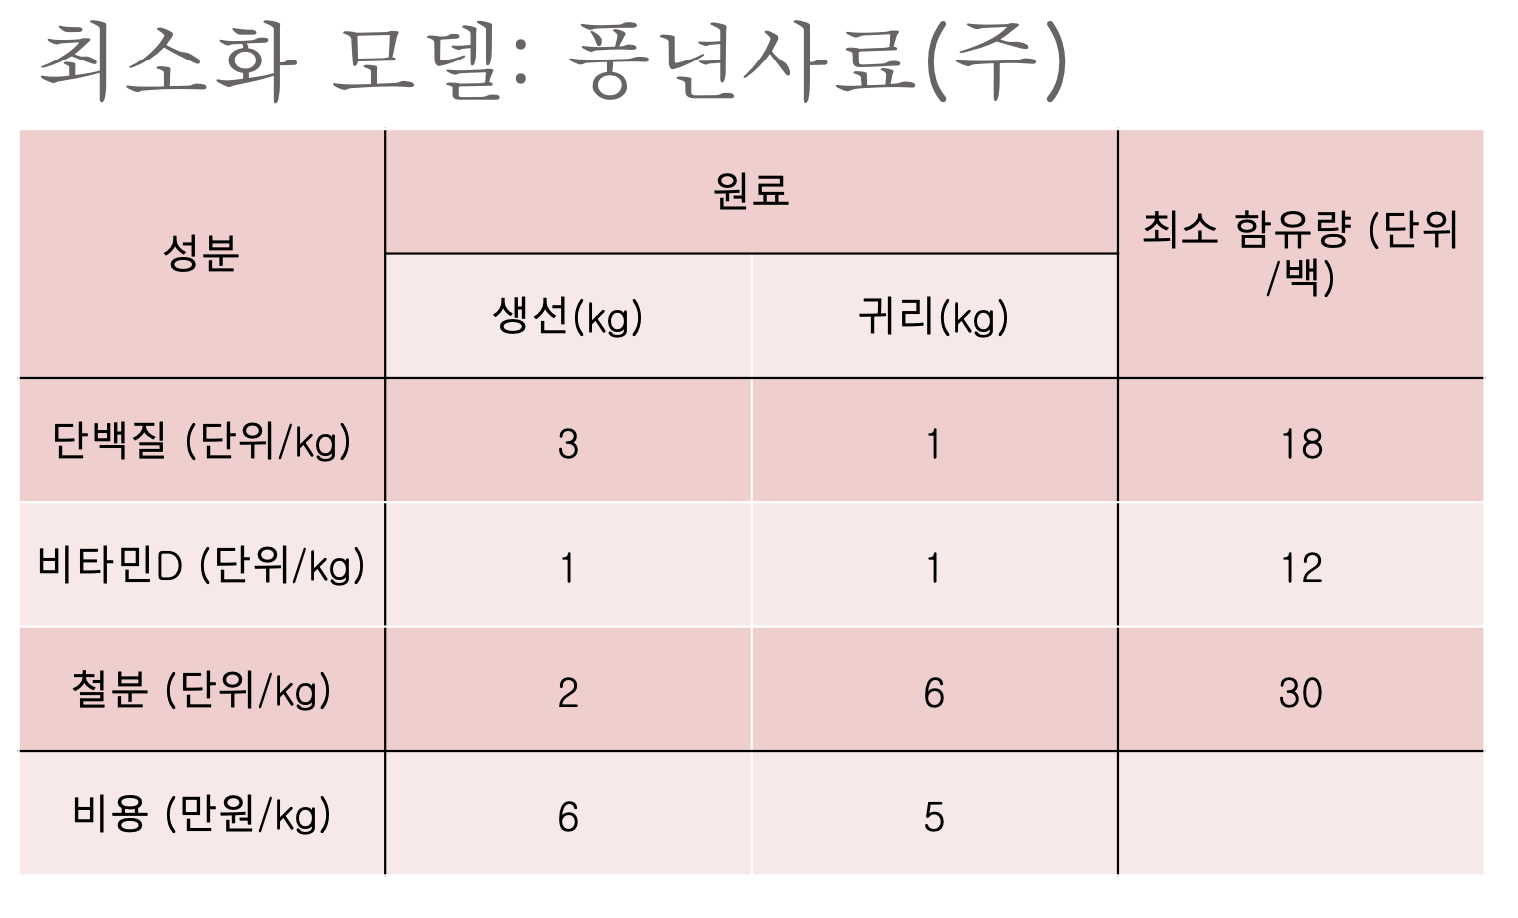

In [4]:
# Install gurobipy library if not installed
%pip install gurobipy

# Import packages
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

# Sets M and P, respectively
ingredient = ['Fish(kg)', 'Oats(kg)']
process = ['Protein(unit/kg)', 'vitaminD(unit/kg)', 'Iron(unit/Kg)']

# Define a gurobipy model for the decision problem
m = gp.Model('poongnyun')

### Set the coefficients
- Input/Output coefficients : for constraints
- Profit : for decision variables

In [3]:
# Coefficients
io_data = [[3,1], [1,1], [2,6]]
io_coeff = pd.DataFrame(io_data, index = process, columns = model)
print('io_coeff :\n',io_coeff)

min_contain = pd.Series([18, 12, 30], index = process, name = 'min_contain(unit/bag)')
print('\nmin containment :\n',min_contain)

cost = pd.Series([6, 5], index = model, name = 'unit_cost')
print('\ncost :\n',cost)

io_coeff :
                    Fish(kg)  Oats(kg)
Protein(unit/kg)          3         1
vitaminD(unit/kg)         1         1
Iron(unit/Kg)             2         6

min containment :
 Protein(unit/kg)     18
vitaminD(unit/kg)    12
Iron(unit/Kg)        30
Name: min_contain(unit/bag), dtype: int64

cost :
 Fish(kg)    6
Oats(kg)    5
Name: unit_cost, dtype: int64


### Set the decision variables
- Fish(kg) : # of units to use
- Oats(kg) : # of units to use

In [5]:
# Add vars with the combination of process and model
x = m.addVars(ingredient, name = 'ingredient_to_use')
m.update()

print(x)

{'Fish(kg)': <gurobi.Var ingredient_to_use[Fish(kg)]>, 'Oats(kg)': <gurobi.Var ingredient_to_use[Oats(kg)]>}



### Set the constraints

In [6]:
m.addConstrs((gp.quicksum(io_coeff[ing][p] * x[ing] for ing in ingredient) >= min_contain[p] for p in process), name = 'ingredient_constraint')
m.addConstrs((x[ing] >= 0 for ing in ingredient), name = 'nonnegative_constraint')
m.update()

### Set the objective

In [7]:
m.setObjective(gp.quicksum(cost[ing]*x[ing] for ing in ingredient), GRB.MINIMIZE)

# Write down the results
m.write('poongnyun_model.lp')

# Optimization
m.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 5 rows, 2 columns and 8 nonzeros
Model fingerprint: 0xd6130350
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [5e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 3e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.025000e+01   0.000000e+00      0s
       2    6.3000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  6.300000000e+01


### Extract values

In [8]:
all_vars = {v.varName: v.x for v in m.getVars()}
all_vars

{'ingredient_to_use[Fish(kg)]': 3.0, 'ingredient_to_use[Oats(kg)]': 9.0}

### Freeing Gurobi environment

In [ ]:
m.dispose()
gp.disposeDefaultEnv()